In [1]:
import pandas as pd
# import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# import matplotlib.pyplot as plt
# from natsort import index_natsorted
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [191]:
%matplotlib inline
pyo.init_notebook_mode(connected=True)

In [192]:
full_nctcdf = pd.read_csv("../2022-10-06_nctcdb.tsv", sep='\t', index_col=0)
full_nctcdf = full_nctcdf.sort_values(by=["NCTC_Number"], ascending=True, key=lambda x: np.argsort(index_natsorted(full_nctcdf["NCTC_Number"])), ignore_index=True)
full_nctcdf[['Species','Subspecies']] = full_nctcdf['Current_Name'].str.split('subsp.', 1, expand=True)
full_nctcdf = full_nctcdf.replace(np.nan, 'Null', regex=True)
full_nctcdf

genomeandyear_nctcdf = full_nctcdf.loc[(full_nctcdf['Year_Cultured']!=-1) & (full_nctcdf['Assembly_Accessions']!='Null')].copy()

In [193]:
family_name = genomeandyear_nctcdf['Species'].str.split(' ', expand=True)[0].str[0]
species_name = genomeandyear_nctcdf['Species'].str.split(' ', expand=True)[1]
genomeandyear_nctcdf['Specie_Name'] = family_name + ". " + species_name
specie_counts = genomeandyear_nctcdf['Specie_Name'].value_counts()
topx = specie_counts.head(5).index.tolist()
genomeandyear_nctcdf['TopSpecies'] = genomeandyear_nctcdf['Specie_Name']
genomeandyear_nctcdf.loc[~genomeandyear_nctcdf['TopSpecies'].isin(topx), ['TopSpecies']] = 'Other'
topx.insert(0, 'Other')

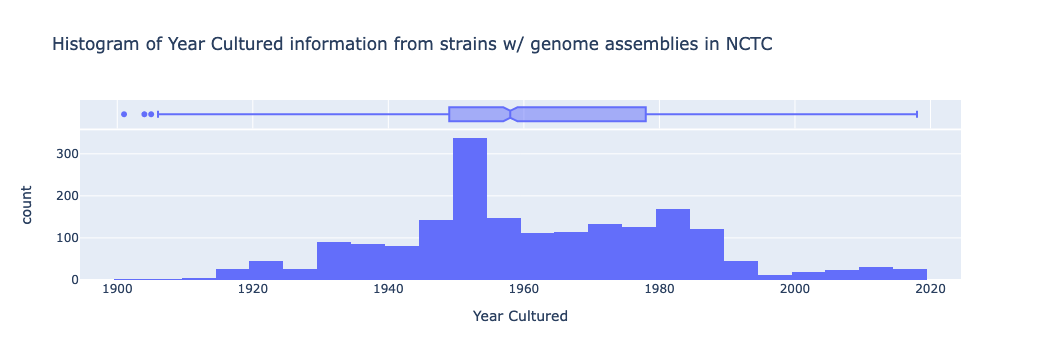

In [194]:
px.histogram(
    genomeandyear_nctcdf, 
    x="Year_Cultured",
    labels={'Year_Cultured':'Year Cultured'}, 
    title="Histogram of Year Cultured information from strains w/ genome assemblies in NCTC",
    marginal='box'
)

In [195]:
# sns.set_theme(font='Arial', style='white')
# sns.set_palette("deep")
# histogram = sns.histplot(
#     data=genomeandyear_nctcdf,
#     x='Year_Cultured',
#     hue='TopSpecies',
#     multiple="stack",
#     hue_order=topx,
#     legend='full'
# )
# histogram.set(xlabel='Year Cultured', title='Genomic isolates over time')
# legend = histogram.get_legend()
# handles = legend.legendHandles
# legend.remove()
# histogram.legend(handles, topx, title="Species")
# # histogram._legend.set_title('Species')
# figure = plt.gcf() # get current figure
# figure.set_size_inches(7, 3.5)
# plt.savefig('./year_cultured-hist.png', dpi=300, bbox_inches='tight', transparent=False)

In [196]:
def plot_givenspecies(df, species):
    print("\nFound %s assemblies..." % df.loc[df['Species'].str.contains(species)].shape[0])
    x = px.histogram(
        df.loc[df['Species'].str.contains(species)], 
        x="Year_Cultured", 
        labels={'Year_Cultured':'Year Cultured',
                'NCTC_Number': 'NCTC Accession Number',
                'Isolated_From': "Isolated from",
                'Assembly_Accessions': "ENA Assembly Accession"
               }, 
        title="Histogram of Year Cultured information from " + species,
        marginal="rug",
        hover_data=["NCTC_Number", "Year_Cultured", "Isolated_From", 'Assembly_Accessions']
    )
    x.show()
    
interact(plot_givenspecies, 
         df=fixed(genomeandyear_nctcdf), 
         species=list(genomeandyear_nctcdf['Species'].value_counts().to_frame().index),
        );

interactive(children=(Dropdown(description='species', options=('Escherichia coli', 'Salmonella enterica ', 'St…

In [189]:
# species_counts = genomeandyear_nctcdf['Species'].value_counts().reset_index()
# species_counts = species_counts.rename(columns={'index': 'Species', 'Species': 'Count'})
# family_name = species_counts['Species'].str.split(' ', expand=True)[0].str[0]
# species_name = species_counts['Species'].str.split(' ', expand=True)[1]
# species_counts['Species'] = family_name + ". " + species_name
# merged_species_counts = species_counts.groupby('Species').sum().sort_values('Count', ascending=False).reset_index()
# barplot = sns.barplot(data=merged_species_counts.head(10), 
#             x='Species', 
#             y='Count',
#             facecolor="#7995C4",
#            )
# barplot.set(title='Counts of the top 10 species in the database')

# figure = plt.gcf() # get current figure
# figure.set_size_inches(7, 3.5)
# plt.xticks(rotation=45, ha='right')
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tight_layout()
# plt.savefig('./species_dist-bar.png', dpi=300, bbox_inches='tight', transparent=False)